# Terrain Reclassify + Cross Tabulate

##### *An Xarray-Spatial Example*
------------

In [6]:
from xrspatial.classify import reclassify
from xrspatial.classify import quantile # to get example zones
from xrspatial.zonal import crosstab

from xrspatial import slope
from xrspatial import generate_terrain

import numpy as np
import datashader as ds

from datashader.transfer_functions import shade
from datashader.transfer_functions import stack
from datashader.transfer_functions import dynspread
from datashader.transfer_functions import set_background
from datashader.colors import Elevation
import pandas as pd

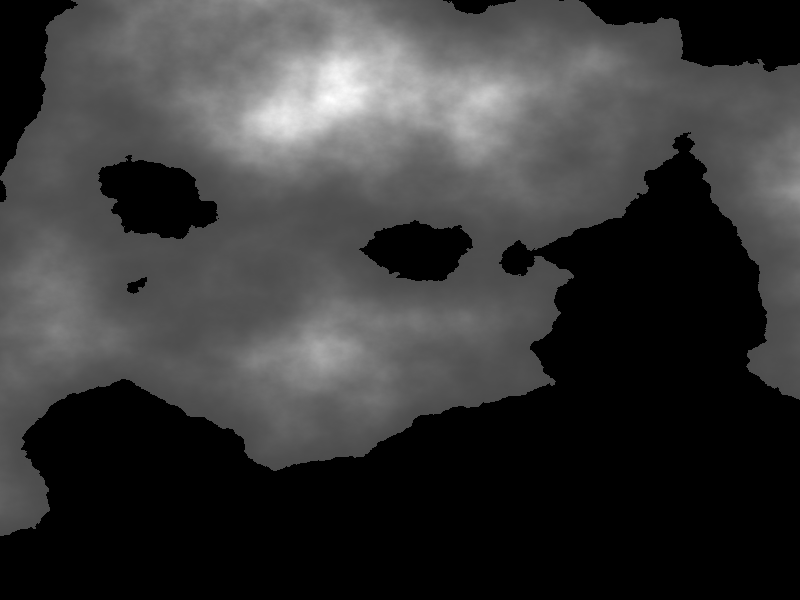

In [7]:
from xrspatial import generate_terrain

W = 800
H = 600

cvs = ds.Canvas(plot_width=W, plot_height=H, x_range=(-20e6, 20e6), y_range=(-20e6, 20e6))
terrain = generate_terrain(canvas=cvs)

shade(terrain, cmap=['black', 'white'], how='linear')

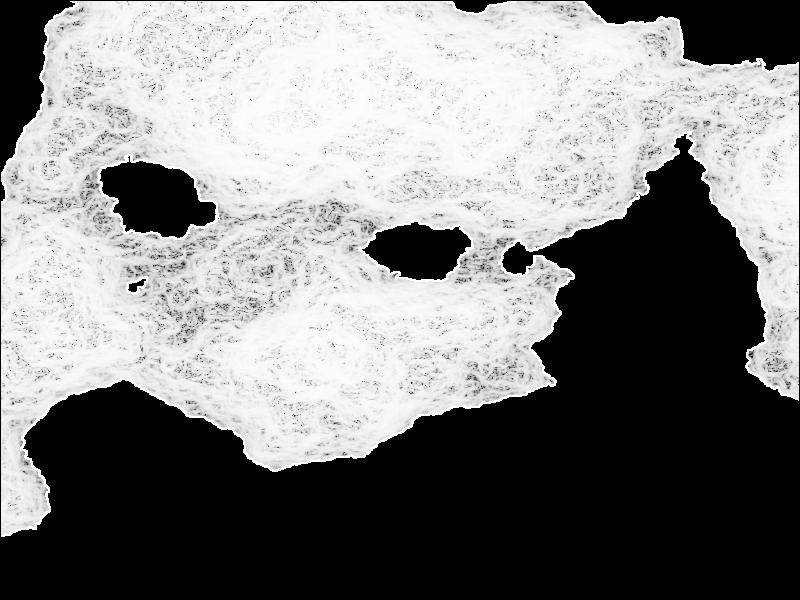

In [8]:
slope_raster = slope(terrain)
shade(slope_raster, cmap=['black', 'white'], how='linear')

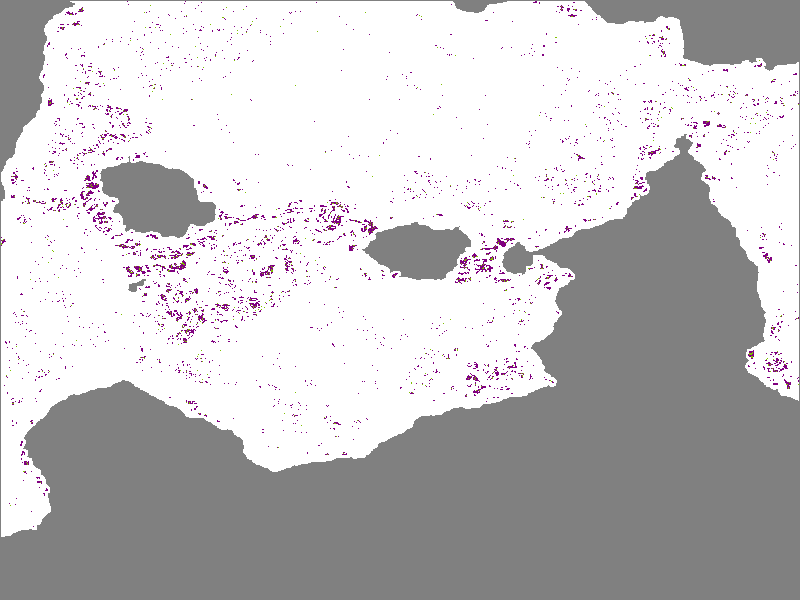

In [14]:
slope_reclassify = reclassify(slope_raster, bins=(0, 30, 60), new_values=(1, 2, 3))
slope_reclassify.data = slope_reclassify.data.astype('uint8')
shade(slope_reclassify, cmap=['gray', 'green', 'yellow', 'purple'], how='linear')

Quantile Warning: Not enough unique values for k classes (using 7 bins)


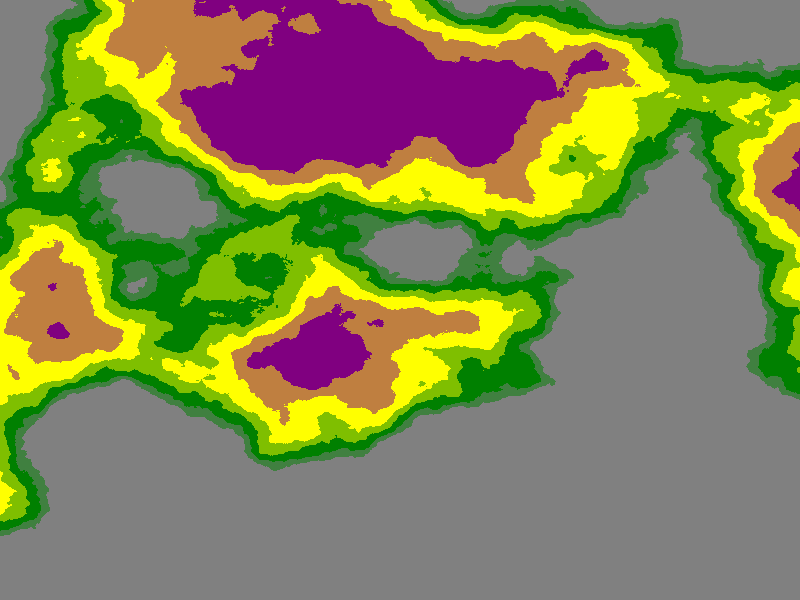

In [15]:
zones = quantile(terrain, k=10)
zones.data = zones.data.astype('uint64') + 3
shade(zones, cmap=['gray', 'green', 'yellow', 'purple'], how='linear')

In [24]:
cols_names = {0: 'slope_class0', 1: 'slope_class1', 2: 'slope_class2', 3: 'slope_class3', }
crosstab_df = crosstab(zones, slope_reclassify, layer=None).rename(columns=cols_names)
crosstab_df

,slope_class0,slope_class1,slope_class2,slope_class3
3,0.018216,0.981770,0.000009,0.000005
4,0.912394,0.004326,0.008612,0.074668
5,0.932750,0.002500,0.007625,0.057125
6,0.967104,0.004021,0.003292,0.025583
7,0.978521,0.006437,0.001563,0.013479
8,0.987125,0.003542,0.001000,0.008333
9,0.993062,0.004271,0.000250,0.002417


In [21]:
crosstab_df.rename?